In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\91822\OneDrive\Documents\Capstone-05\Copper_Set.xlsx - Result 1 (1).csv",low_memory=False)
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
for i in list(df.columns):
    print(f"{i}:{df[i].nunique()}")

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16410
product_ref:33
delivery date:28
selling_price:9795


In [6]:
# convert the data type from object to numeric

df['item_date']=pd.to_datetime(df['item_date'],format='%Y%m%d',errors='coerce')
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [7]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [8]:
df.drop(columns=['id','material_ref'], inplace=True)

In [9]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,181670,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,2020-11-26 22:56:58.127374080,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
min,2020-07-02 00:00:00,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,2020-09-29 00:00:00,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,2020-11-30 00:00:00,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,2021-02-03 00:00:00,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08
std,NaN,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05


In [10]:
# quantity and selling price values are not below 0. so we convert to null for below 0 values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181668.0,5875.066247,0.00001,10.971217,30.365013,67.161335,1000000000.0,2349107.102735
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
selling_price,181665.0,1918.124252,0.1,669.0,812.0,953.0,100001015.0,331802.034663


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [13]:
df.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0


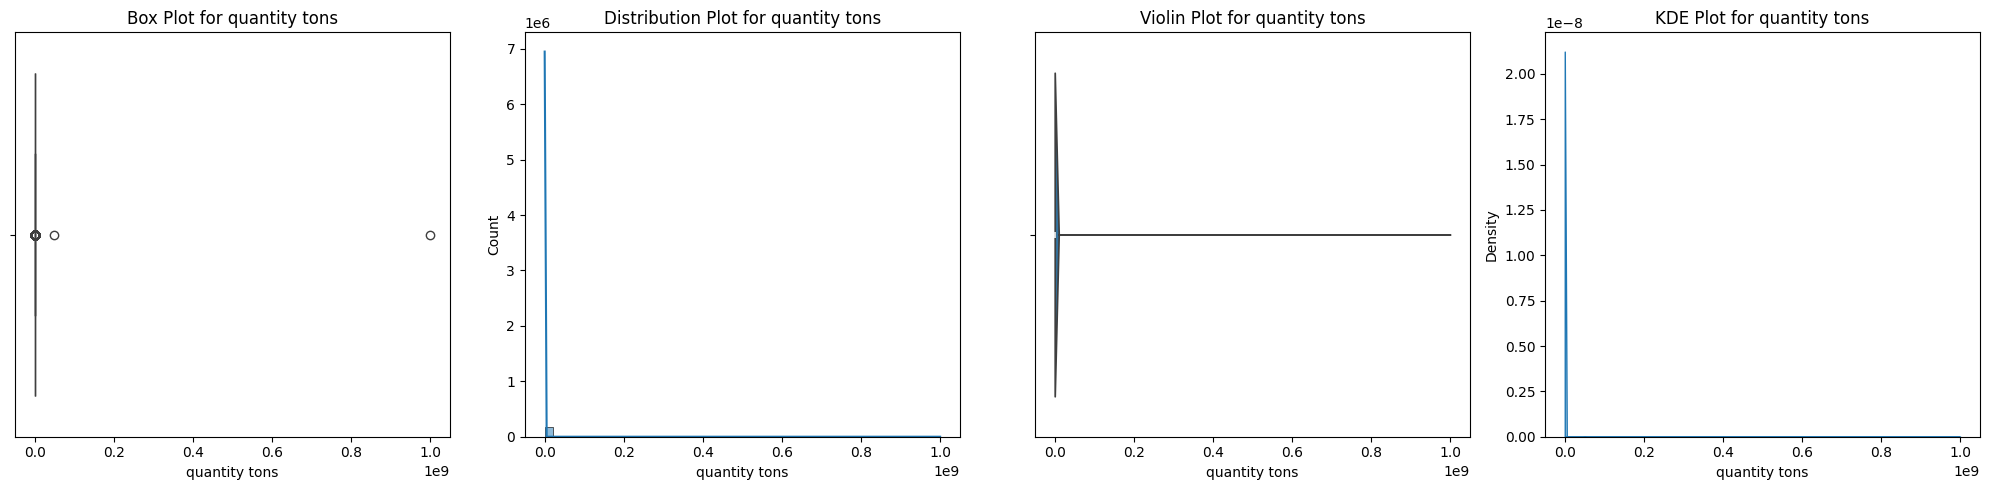

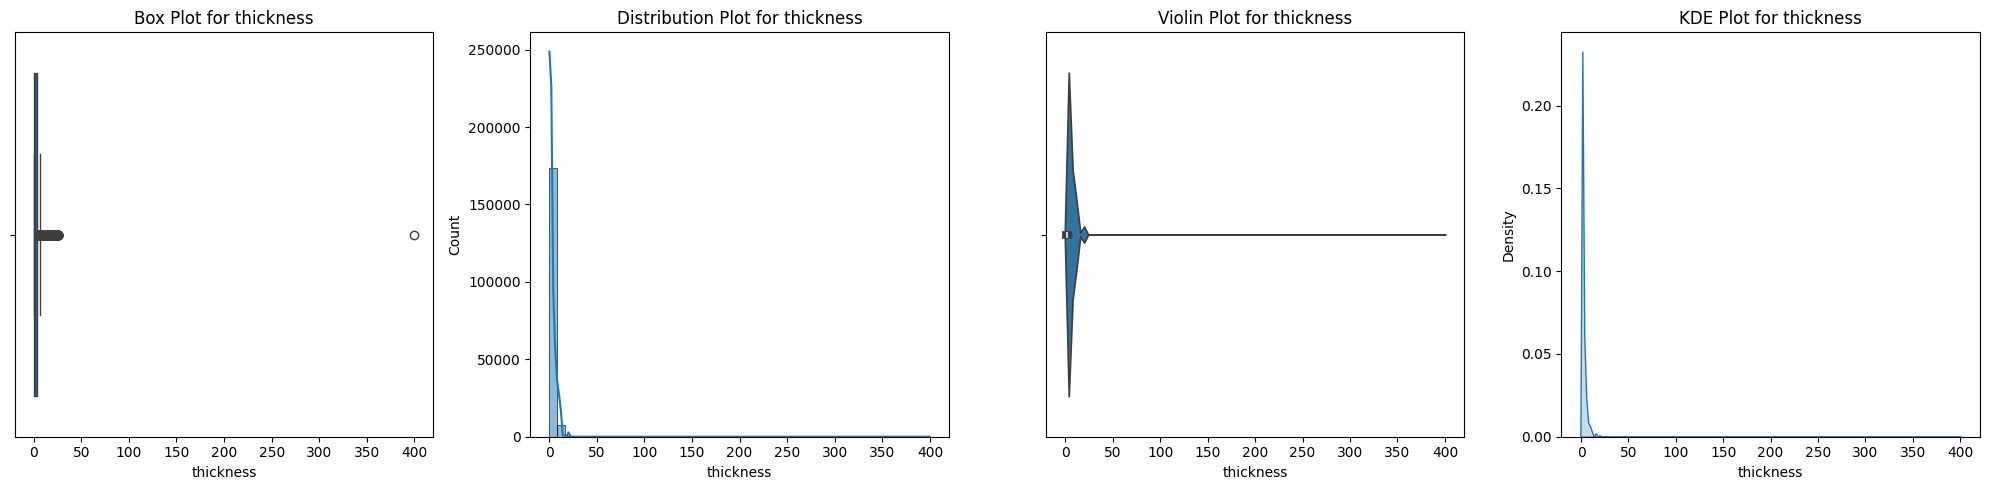

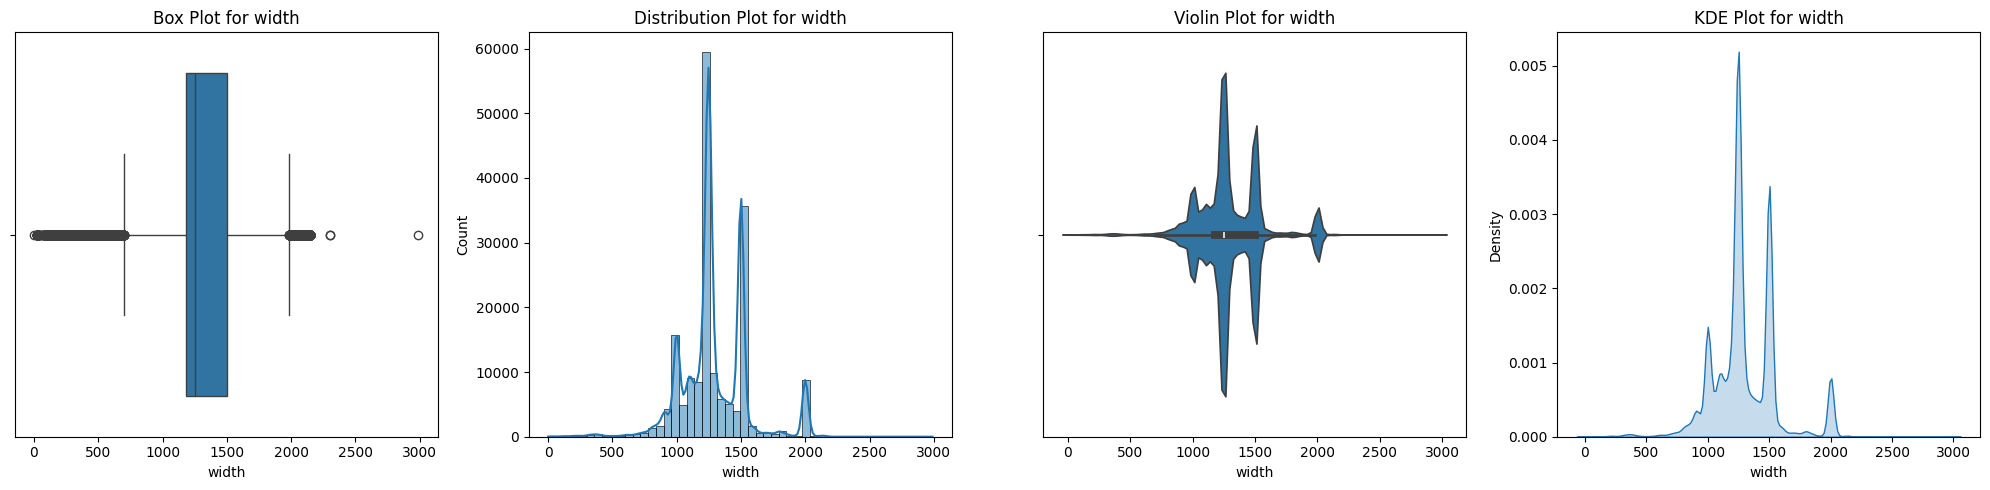

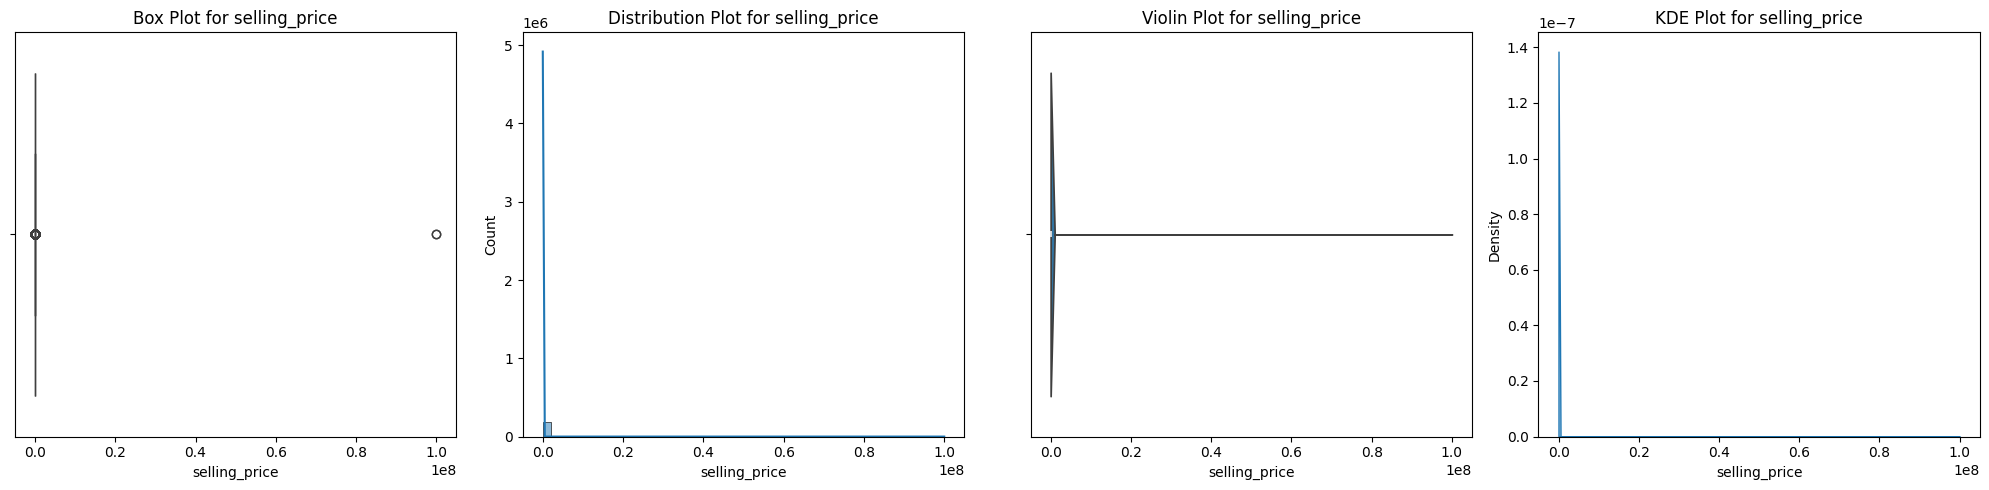

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(df, column):
    plt.figure(figsize=(20,5))
    
    plt.subplot(1,4,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,4,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,4,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')

    plt.subplot(1,4,4)
    sns.kdeplot(data=df, x=column, shade=True)
    plt.title(f'KDE Plot for {column}')

    plt.tight_layout()
    plt.show()

# Example usage
for i in ['quantity tons','thickness', 'width', 'selling_price']:
    plot(df, i)


In [15]:
def apply_transformation(df, columns):
    for column in columns:
        df[f'{column}_log'] = np.log(df[column] + 1)  # Adding 1 to avoid log(0)
    return df
skewed_columns = ['thickness', 'selling_price', 'quantity tons']
df = apply_transformation(df, skewed_columns)

In [16]:
df.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,thickness_log,selling_price_log,quantity tons_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0,1.098612,6.751101,4.010077
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0,0.587787,6.954639,6.645123


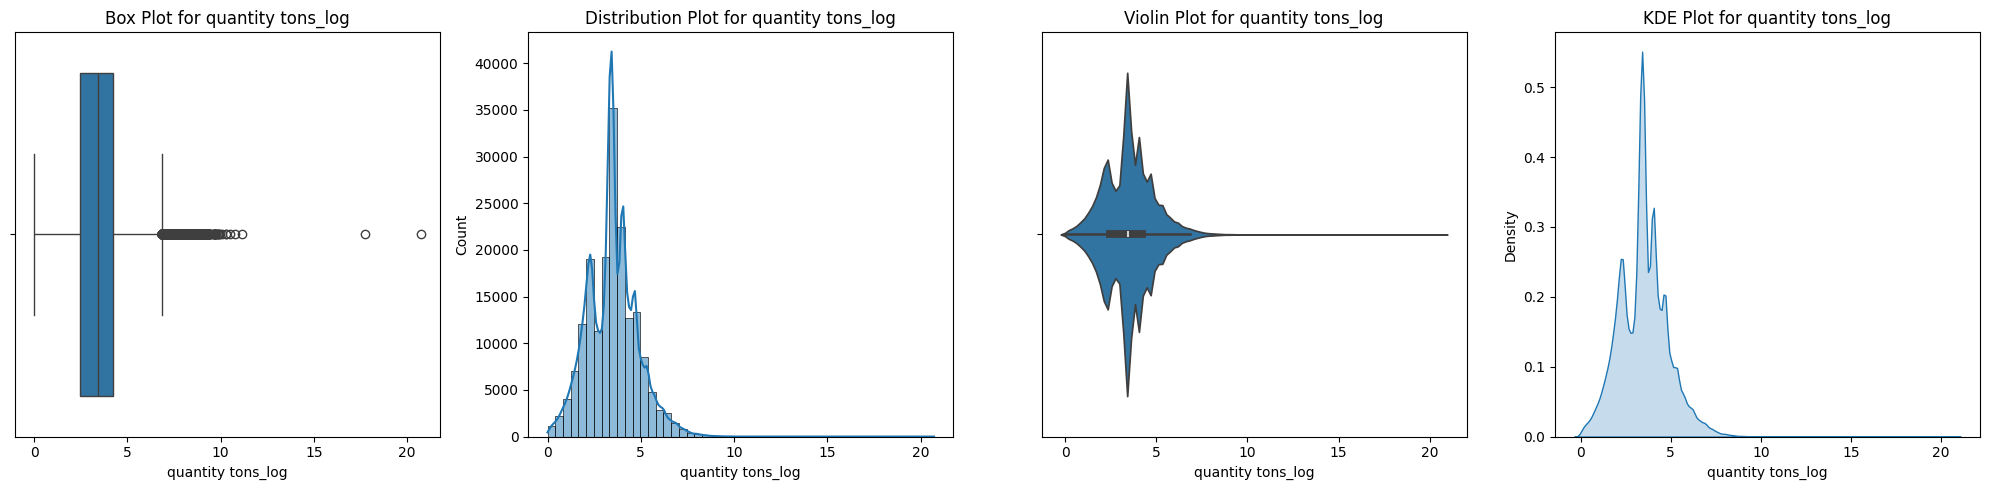

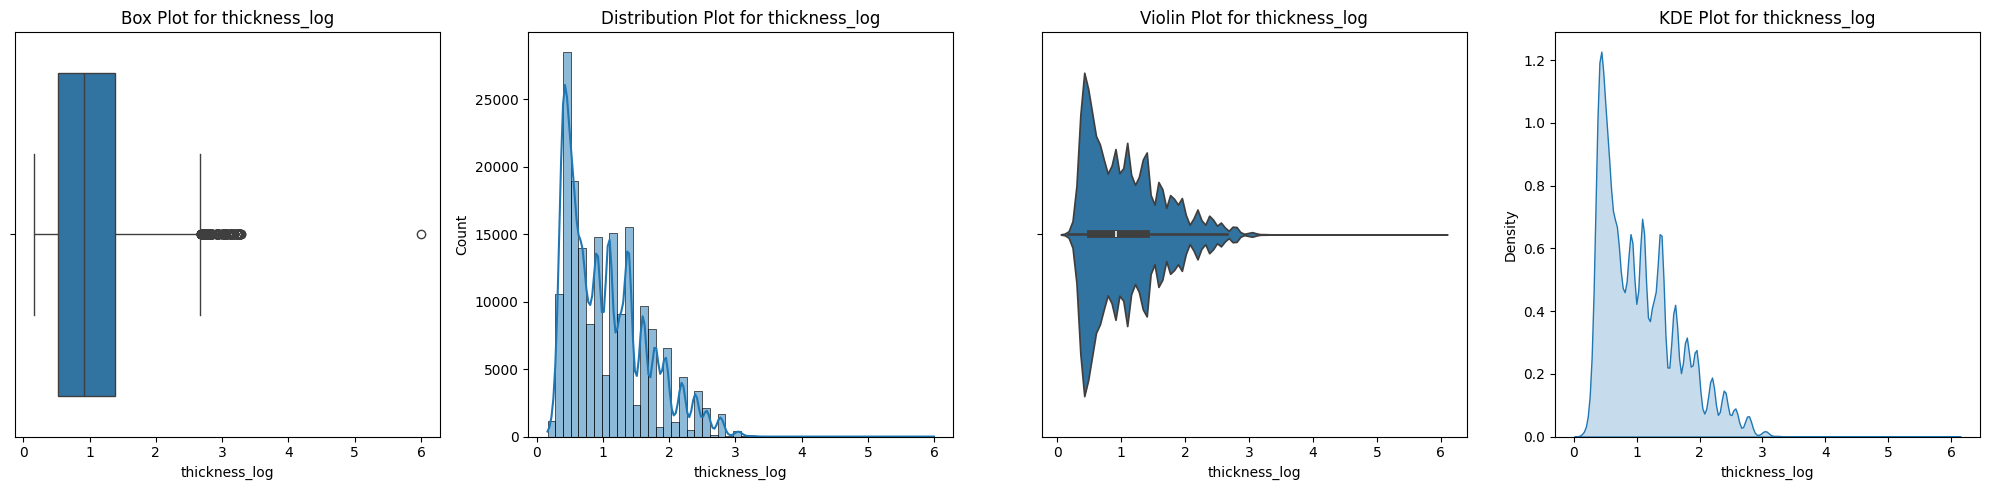

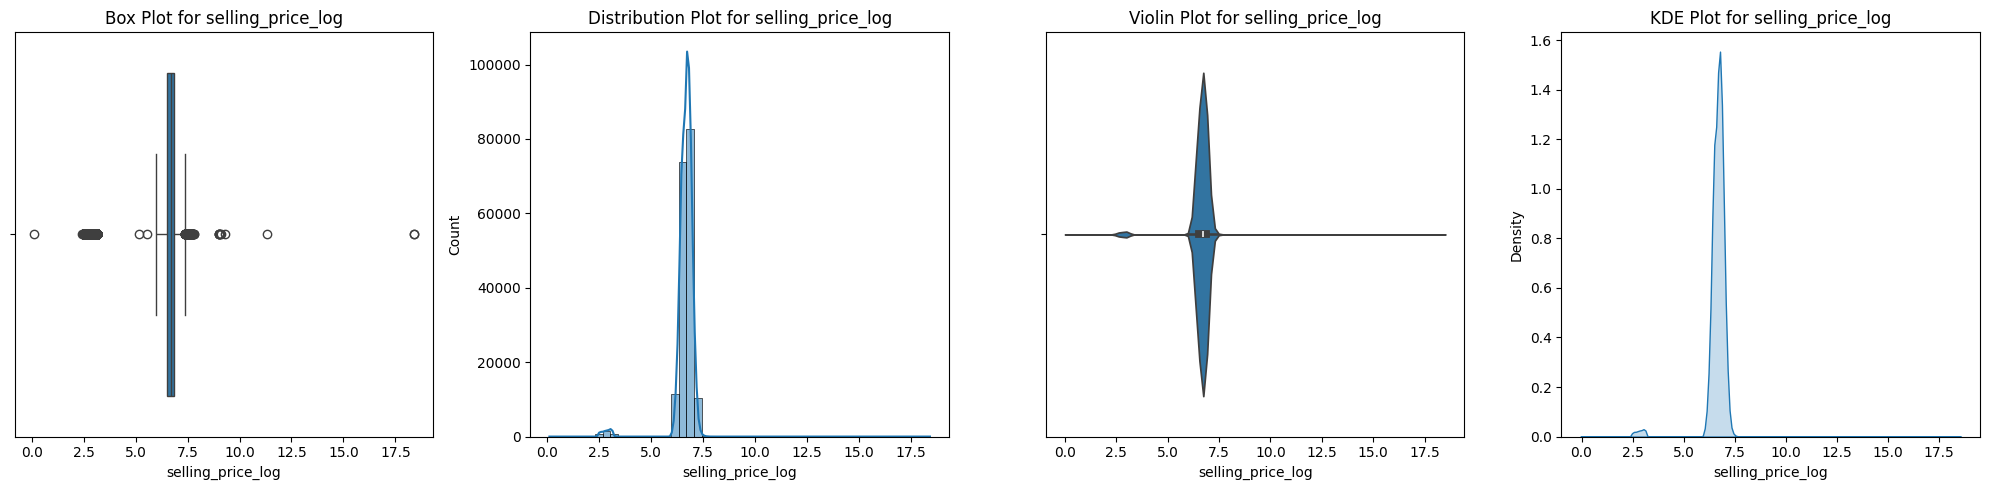

In [17]:
for i in ['quantity tons_log', 'thickness_log','selling_price_log']:
    plot(df, i)

In [18]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

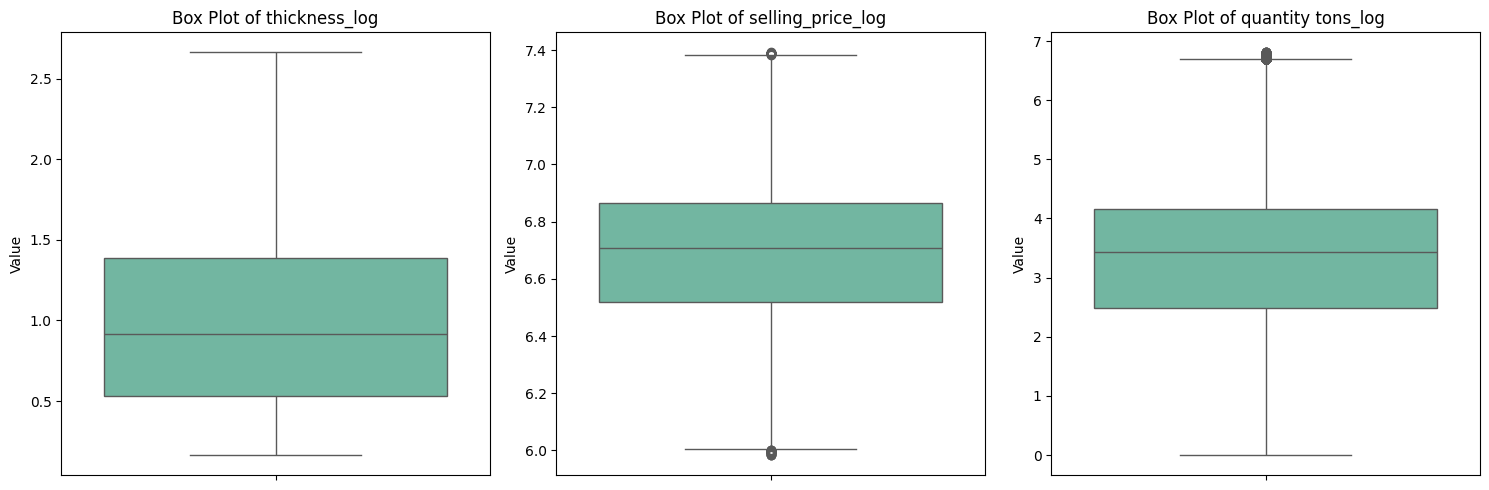

In [19]:
columns_with_outliers = ['thickness_log', 'selling_price_log', 'quantity tons_log']

# Remove outliers using the IQR method
df = remove_outliers_iqr(df, columns_with_outliers)

# Plot separate box plots for each column after removing outliers
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(1, len(columns_with_outliers), i)
    sns.boxplot(data=df[column], orient="v", palette="Set2")
    plt.title(f'Box Plot of {column}')
    plt.ylabel("Value")

plt.tight_layout()
plt.show()

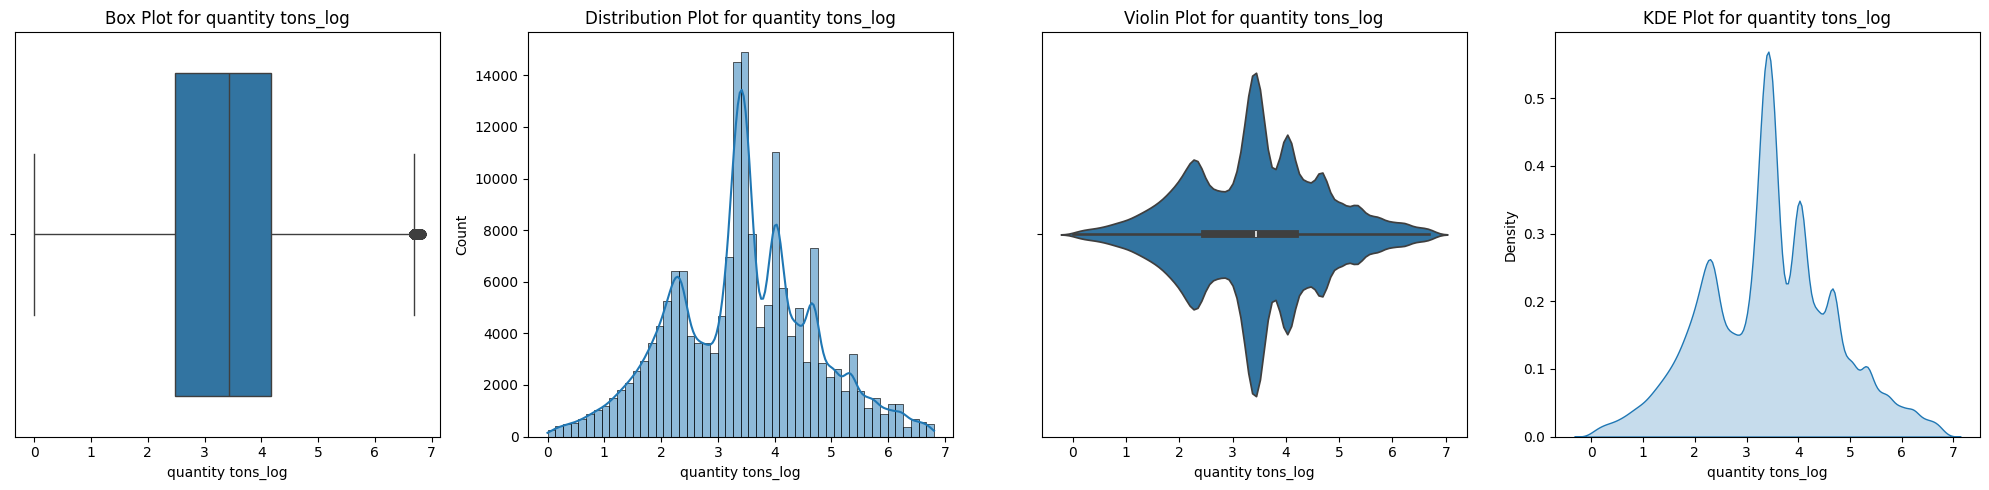

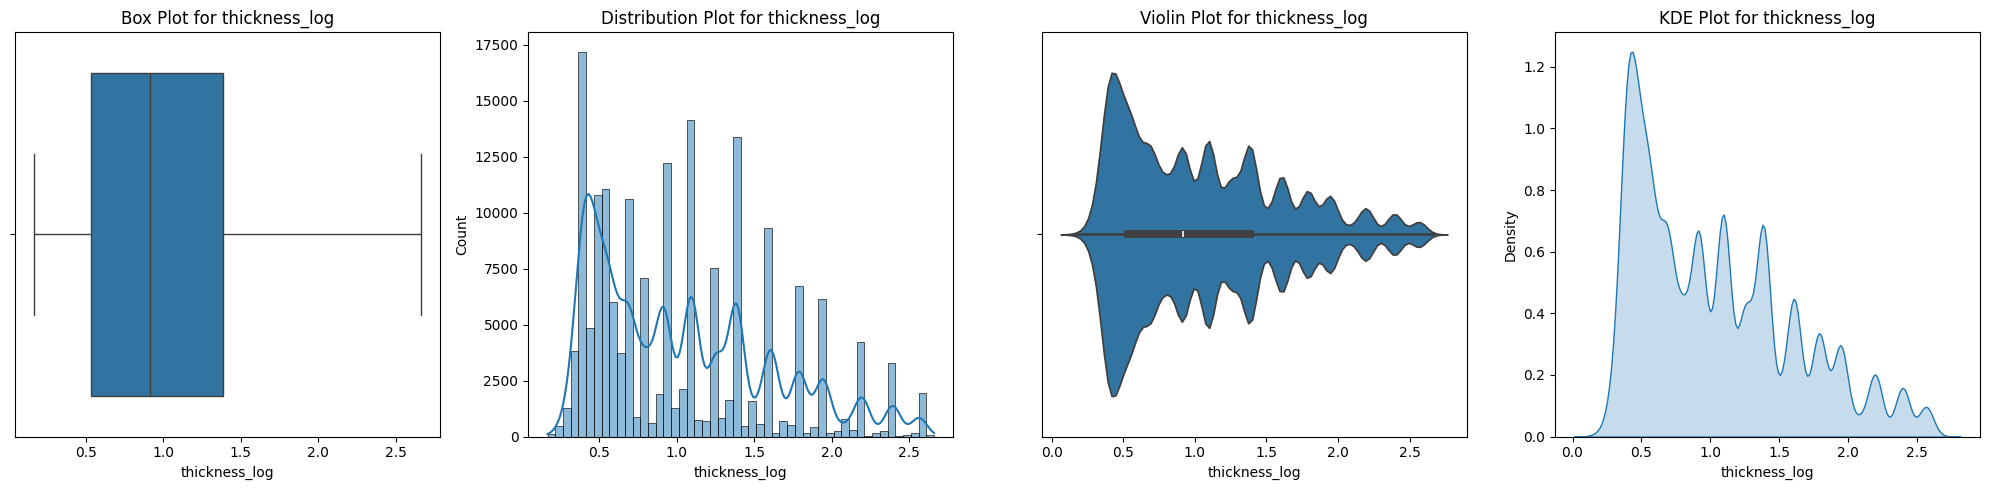

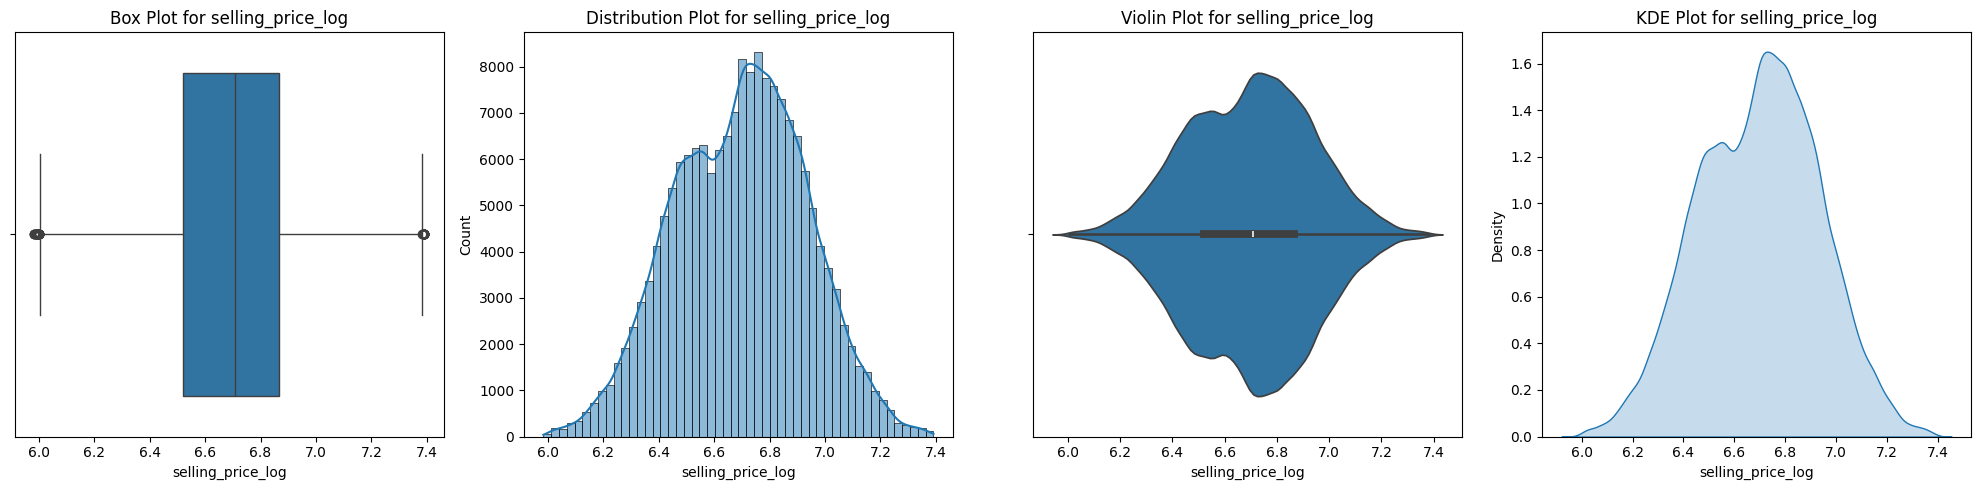

In [20]:
for i in ['quantity tons_log', 'thickness_log','selling_price_log']:
    plot(df, i)

In [21]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'thickness_log', 'selling_price_log',
       'quantity tons_log'],
      dtype='object')

In [22]:
df1 = df.copy()  # Make a copy of the DataFrame
df1.drop(columns=['item_date', 'quantity tons', 'thickness', 'delivery date'], inplace=True)


In [23]:
df1.head(2)

,customer,country,status,item type,application,width,product_ref,selling_price,thickness_log,selling_price_log,quantity tons_log
0,30156308.0,28.0,Won,W,10.0,1500.0,1670798778,854.0,1.098612,6.751101,4.010077
1,30202938.0,25.0,Won,W,41.0,1210.0,1668701718,1047.0,0.587787,6.954639,6.645123


In [24]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
df1['status_en'] = OE.fit_transform(df1[['status']])
df1['item type_en'] = OE.fit_transform(df1[['item type']])


In [25]:
df1.drop(columns=['status','item type'],inplace=True)

In [26]:
df1.head(2)

,customer,country,application,width,product_ref,selling_price,thickness_log,selling_price_log,quantity tons_log,status_en,item type_en
0,30156308.0,28.0,10.0,1500.0,1670798778,854.0,1.098612,6.751101,4.010077,6.0,5.0
1,30202938.0,25.0,41.0,1210.0,1668701718,1047.0,0.587787,6.954639,6.645123,6.0,5.0


In [27]:
x=df1.drop(columns=['selling_price_log'])
y=df1['selling_price_log']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

# Assuming x and y are your features and target variable, respectively

# Step 2: Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

# Step 3: Choose algorithms
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
}

# Step 4: Train models
for model_name, model in models.items():
    model.fit(x_train, y_train)

# Step 5: Predict
predictions = {model_name: model.predict(x_test) for model_name, model in models.items()}

# Step 6: Evaluate
results = {}
for model_name, preds in predictions.items():
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    num_features = x_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))
    results[model_name] = {"MSE": mse, "R2": r2, "Adjusted R2": adjusted_r2}

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MSE: {metrics['MSE']}")
    print(f"R2: {metrics['R2']}")
    print(f"Adjusted R2: {metrics['Adjusted R2']}")
    print()


Model: Linear Regression
MSE: 0.0012397069343642886
R2: 0.977955049477848
Adjusted R2: 0.9779508116127367

Model: Decision Tree Regressor
MSE: 2.2074904305369534e-09
R2: 0.9999999607455472
Adjusted R2: 0.999999960738001

Model: Random Forest Regression
MSE: 1.1056580666399274e-09
R2: 0.9999999803387586
Adjusted R2: 0.9999999803349789

Model: Gradient Boosting Regression
MSE: 4.8326772446079456e-06
R2: 0.999914063455004
Adjusted R2: 0.9999140469347816



For Regression Model, Random Forest Regression Performs well with 99% accuracy

In [29]:
df1.head(2)

,customer,country,application,width,product_ref,selling_price,thickness_log,selling_price_log,quantity tons_log,status_en,item type_en
0,30156308.0,28.0,10.0,1500.0,1670798778,854.0,1.098612,6.751101,4.010077,6.0,5.0
1,30202938.0,25.0,41.0,1210.0,1668701718,1047.0,0.587787,6.954639,6.645123,6.0,5.0


In [30]:
Random_Forest_Regression= RandomForestRegressor()
Random_Forest_Regression.fit(x,y)

RandomForestRegressor()

In [31]:
import joblib
joblib.dump(Random_Forest_Regression,"Regression_Model")

['Regression_Model']

In [32]:
quantity_tons_log = np.log(4.010077)
status_en = 7.0
item_type_en = 5.0
application = 10.0
thickness_log = np.log(1.098612)
width = 1500
country = 25.0
customer = 30202938.0	
product_ref = 1670798778

new_sample = np.array([[quantity_tons_log, status_en, item_type_en, application,
                         thickness_log, width, country, customer, product_ref,0]])


# Make predictions using the trained RandomForestRegressor model
new_pred = Random_Forest_Regression.predict(new_sample)

# Display the predicted resale price
print("Selling Price:", new_pred)

Selling Price: [7.313921]


In [33]:
quantity_tons_log = np.log(4.010077)
status_en = 7.0
item_type_en = 5.0
application = 10.0
thickness_log = np.log(1.098612)
width = 1500
country = 25.0
customer = 30202938.0	
product_ref = 1670798778

new_sample = np.array([[quantity_tons_log, status_en, item_type_en, application,
                         thickness_log, width, country, customer, product_ref,0]])
# Make predictions using the trained RandomForestRegressor model
new_pred = Random_Forest_Regression.predict(new_sample)[0]

# Display the predicted selling price
print("Selling Price:", np.exp(new_pred))

Selling Price: 1501.0512841716163


In [34]:
df1.tail(2)

,customer,country,application,width,product_ref,selling_price,thickness_log,selling_price_log,quantity tons_log,status_en,item type_en
181670,30200854.0,25.0,41.0,1250.0,164141591,619.0,0.536493,6.429719,1.655480,6.0,5.0
181672,30200854.0,25.0,41.0,1240.0,164141591,607.0,0.536493,6.410175,6.010499,6.0,5.0


In [35]:
quantity_tons_log = np.log(1.655480)
status_en = 6.0
item_type_en = 5.0
application = 41.0
thickness_log = np.log(0.536493	)
width = 1250
country = 25.0
customer = 30200854.0	
product_ref = 164141591	

new_sample = np.array([[quantity_tons_log, status_en, item_type_en, application,
                         thickness_log, width, country, customer, product_ref,0]])
# Make predictions using the trained RandomForestRegressor model
new_pred = Random_Forest_Regression.predict(new_sample)[0]

# Display the predicted selling price
print("Selling Price:", np.exp(new_pred))

Selling Price: 1251.0119989065975


In [36]:
# Saving the model
import pickle
with open('Regression_model.pkl', 'wb') as file:
    pickle.dump(Random_Forest_Regression, file)